In [16]:
from random import randint, uniform
from threading import Thread, Lock
from concurrent.futures import ThreadPoolExecutor

import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt

In [17]:
MIN_FLOAT_VALUE = 0.0
MAX_FLOAT_VALUE = 25.0
MIN_FLOAT_EXPONENT = 2
MAX_FLOAT_EXPONENT = 4

DIM_RANGE = range(110, 190)

EXCEL_NAME = 'values.xlsx'

DATA_COLUMNS = ['vector_b','vector_d','vector_e','matrix_mc', 'matrix_mz', 'matrix_mm', 'matrix_mt', 'matrix_me']
RESULT_FILE = "result.txt"

FIRST_PLOT = "А=В*МС+D*MZ+E*MM"
SECOND_PLOT = "MG=min(D+E)*MM*MT-MZ*ME"

In [18]:
class LabMathConstructs:
  def vector(self, d):
    return np.array(
        [
            round(
                uniform(MIN_FLOAT_VALUE, MAX_FLOAT_VALUE), 
                randint(MIN_FLOAT_EXPONENT, MAX_FLOAT_EXPONENT)
            ) 
            for _ in range(d)
          ]
    )

  def matrix(self, d):
    matrix = np.array(
        [
            round(
                uniform(MIN_FLOAT_VALUE, MAX_FLOAT_VALUE), 
                randint(MIN_FLOAT_EXPONENT, MAX_FLOAT_EXPONENT)
            )
            for _ in range(d ** 2)
        ]
    )
    return matrix.reshape((d, d))

In [19]:
mc = LabMathConstructs()

vector_b = [mc.vector(d) for d in DIM_RANGE]
vector_d = [mc.vector(d) for d in DIM_RANGE]
vector_e = [mc.vector(d) for d in DIM_RANGE]
matrix_mc = [mc.matrix(d) for d in DIM_RANGE]
matrix_mz = [mc.matrix(d) for d in DIM_RANGE]
matrix_mm = [mc.matrix(d) for d in DIM_RANGE]
matrix_mt = [mc.matrix(d) for d in DIM_RANGE]
matrix_me = [mc.matrix(d) for d in DIM_RANGE]

df = pd.DataFrame(list(zip(vector_b, vector_d, vector_e, matrix_mc, matrix_mz, matrix_mm, matrix_mt, matrix_me)), columns=DATA_COLUMNS)
df.to_excel(EXCEL_NAME)
df.head()

,vector_b,vector_d,vector_e,matrix_mc,matrix_mz,matrix_mm,matrix_mt,matrix_me
0,"[0.75, 19.649, 0.3986, 5.536, 24.194, 12.5186,...","[6.32, 24.95, 12.4096, 12.5049, 21.9589, 16.49...","[6.851, 7.6621, 20.3749, 4.53, 19.9181, 24.635...","[[22.37, 6.53, 0.484, 4.7026, 20.0, 15.67, 22....","[[4.4673, 3.43, 19.047, 0.551, 14.38, 7.5661, ...","[[24.471, 22.37, 21.5416, 21.27, 5.1337, 14.74...","[[11.545, 12.687, 3.1799, 12.92, 14.369, 11.10...","[[3.06, 23.5549, 21.57, 2.699, 23.1318, 22.363..."
1,"[23.3495, 6.21, 2.012, 12.78, 24.4039, 24.4175...","[6.0467, 6.625, 8.05, 22.22, 4.16, 10.8732, 20...","[12.427, 22.863, 8.2747, 21.1802, 18.66, 8.994...","[[11.3, 20.606, 12.627, 16.6981, 13.5387, 14.1...","[[10.1466, 6.002, 22.452, 12.932, 15.42, 20.31...","[[12.41, 3.835, 19.81, 24.16, 13.86, 4.225, 18...","[[18.024, 1.23, 10.4062, 2.3985, 12.6581, 7.36...","[[16.7855, 21.4758, 14.5575, 21.5899, 13.6869,..."
2,"[19.174, 13.467, 17.9001, 17.174, 7.8247, 15.4...","[11.719, 14.5976, 2.5971, 3.21, 19.586, 22.26,...","[15.499, 8.25, 1.943, 13.49, 24.577, 12.617, 1...","[[20.573, 18.761, 24.72, 5.21, 17.251, 19.2637...","[[16.37, 8.15, 19.691, 1.28, 4.9, 8.05, 12.655...","[[0.328, 17.24, 12.92, 16.328, 1.902, 15.773, ...","[[13.815, 12.441, 1.17, 1.678, 13.309, 12.42, ...","[[13.9443, 24.57, 20.83, 17.43, 6.74, 12.743, ..."
3,"[20.45, 11.5282, 17.3638, 20.68, 16.909, 5.59,...","[3.63, 19.7231, 7.8076, 20.348, 0.636, 8.952, ...","[6.83, 12.5287, 20.08, 8.8142, 16.092, 5.96, 2...","[[15.44, 11.9, 11.873, 3.9662, 19.064, 19.78, ...","[[6.98, 2.8912, 8.14, 12.74, 10.6297, 22.9084,...","[[14.88, 4.285, 23.2402, 23.67, 11.7251, 18.57...","[[14.247, 19.9903, 15.436, 8.958, 7.865, 1.02,...","[[21.77, 13.6527, 23.7641, 13.738, 11.454, 2.7..."
4,"[2.2686, 7.595, 19.6075, 6.6467, 1.52, 21.9894...","[12.4462, 3.4, 1.175, 3.661, 10.31, 10.459, 11...","[22.6022, 3.47, 24.85, 6.2, 22.0124, 0.1921, 1...","[[7.4691, 13.0977, 18.631, 2.2136, 8.65, 8.038...","[[10.412, 3.619, 4.705, 8.4343, 19.7067, 11.23...","[[12.0058, 3.403, 19.273, 5.525, 22.808, 7.852...","[[24.49, 21.76, 16.8967, 8.493, 10.791, 17.48,...","[[17.7497, 19.609, 4.24, 20.878, 13.701, 9.79,..."


In [20]:
if (os.path.exists(RESULT_FILE)):
  os.remove(RESULT_FILE)

In [21]:
threadLock = Lock()

In [22]:
def save_result_as_file(text):
  file = open(RESULT_FILE, "a")
  file.write(f"{text}")
  file.close()

In [23]:
class FirstStatement:
  def b_dot_mc(self, b, mc):
    return np.dot(b, mc)

  def d_dot_mz(self, d, mz):
    return np.dot(d, mz)

  def e_dot_mm(self, e, mm):
    return np.dot(e, mm)

  def result_a(self, b_dot_mc, d_dot_mz, e_dot_mm):
    res = np.add(b_dot_mc, np.add(d_dot_mz, e_dot_mm))
    save_result_as_file(res)
    print(res)

In [24]:
class SecondStatement:
  def min_d_add_e(self, d, e):
    return np.amin(np.add(d, e))

  def mm_dot_mt(self, mm, mt):
    return np.dot(mm, mt)

  def mz_dot_me(self, mz, me):
    return np.dot(mz, me)

  def result_mg(self, min_d_add_e, mm_dot_mt, mz_dot_me):
    res = np.subtract(np.dot(min_d_add_e, mm_dot_mt), mz_dot_me)
    save_result_as_file(res)
    print(res)

In [25]:
class LabFirstThread:
    def __init__(self):
      self.fs = FirstStatement()
      self.first_thread_result = None
      self.second_thread_result = None
      self.third_thread_result = None

    def first_thread(self, b, mc): 
        result = self.fs.b_dot_mc(b, mc)
        
        threadLock.acquire()
        self.first_thread_result = result
        threadLock.release()

    def second_thread(self, d, mz):
        result = self.fs.d_dot_mz(d, mz)

        threadLock.acquire()
        self.second_thread_result = result
        threadLock.release()

    def third_thread(self, e, mm):
        result = self.fs.e_dot_mm(e, mm)

        threadLock.acquire()
        self.third_thread_result = result
        threadLock.release()

    def fourth_thread(self):
        if self.first_thread_result.all() and self.second_thread_result.all() and self.third_thread_result.all():
            self.fs.result_a(self.first_thread_result, self.second_thread_result, self.third_thread_result)

In [26]:
class LabSecondThread:
    def __init__(self):
      self.ss = SecondStatement()
      self.first_thread_result = None
      self.second_thread_result = None
      self.third_thread_result = None

    def first_thread(self, d, e):
        result = self.ss.min_d_add_e(d, e)

        threadLock.acquire()
        self.first_thread_result = result
        threadLock.release()

    def second_thread(self, mm, mt):
        result = self.ss.mm_dot_mt(mm, mt)

        threadLock.acquire()
        self.second_thread_result = result
        threadLock.release()

    def third_thread(self, mz, me):
        result = self.ss.mz_dot_me(mz, me)

        threadLock.acquire()
        self.third_thread_result  = result
        threadLock.release()

    def fourth_thread(self):
        if self.first_thread_result.all() and self.second_thread_result.all() and self.third_thread_result.all():
            self.ss.result_mg(self.first_thread_result, self.second_thread_result, self.third_thread_result)

In [27]:
class LabRuns:
  def __init__(self):
    self.xs_1_1 = []
    self.ys_1_1 = []

    self.xs_1_2 = []
    self.ys_1_2 = []

    self.xs_2_1 = []
    self.ys_2_1 = []

    self.xs_2_2 = []
    self.ys_2_2 = []

    self.starting_time = 0
    self.ending_time = 0
    self.actual_time = 0

  def start_time(self, thread_num, run_num):
      self.starting_time = time.time()
      self.print_thread_start(thread_num, run_num)

  def end_time(self):
      self.ending_time = time.time()
      self.actual_time = self.ending_time - self.starting_time

  def print_thread_start(self, thread_num, run_num):
    print(f"Start Thread #{thread_num}_{run_num}")

  def run_first_thread_first_run(self, i):
    fs = FirstStatement()

    thread = Thread(target=fs.result_a, args=[fs.b_dot_mc(vector_b[i], matrix_mc[i]), fs.d_dot_mz(vector_d[i], matrix_mz[i]), fs.e_dot_mm(vector_e[i], matrix_mm[i]),],)
    thread.start()
    thread.join()

  def run_second_thread_first_run(self, i):
    ss = SecondStatement()

    thread = Thread(target=ss.result_mg, args=[ss.min_d_add_e(vector_d[i], vector_e[i]), ss.mm_dot_mt(matrix_mm[i], matrix_mt[i]), ss.mz_dot_me(matrix_mz[i], matrix_me[i]),],)
    thread.start()
    thread.join()

  def first_run(self):
    for i in range(0, len(DIM_RANGE)):
        self.ys_1_1.append(len(vector_b[i]))
        
        self.start_time(i + 1, 1)
        self.run_first_thread_first_run(i)
        self.end_time()

        self.xs_1_1.append(self.actual_time)
        self.ys_1_2.append(len(vector_b[i]))
        
        self.start_time(i + 1, 2)
        self.run_second_thread_first_run(i)
        self.end_time()
        
        self.xs_1_2.append(self.actual_time)

  def run_first_threads_second_run(self, i):
    self.ys_2_1.append(len(vector_b[i]))

    mainThread = LabFirstThread()

    self.start_time(i + 1, 1)

    with ThreadPoolExecutor(max_workers=4) as executor:
        future1 = executor.submit(lambda: mainThread.first_thread(vector_b[i], matrix_mc[i]))
        future2 = executor.submit(lambda: mainThread.second_thread(vector_d[i], matrix_mz[i]))
        future3 = executor.submit(lambda: mainThread.third_thread(vector_e[i], matrix_mm[i]))

        future1.result()
        future2.result()
        future3.result()

        future4 = executor.submit(lambda: mainThread.fourth_thread())

        future4.result()
        
        executor.shutdown()

    self.end_time()

    self.xs_2_1.append(self.actual_time)
    self.ys_2_2.append(len(vector_b[i]))

  def run_second_threads_second_run(self, i):
        mainThread = LabSecondThread()

        self.start_time(i + 1, 2)

        with ThreadPoolExecutor(max_workers=4) as executor:
            future1 = executor.submit(lambda: mainThread.first_thread(vector_d[i], vector_e[i]))
            future2 = executor.submit(lambda: mainThread.second_thread(matrix_mm[i], matrix_mt[i]))
            future3 = executor.submit(lambda: mainThread.third_thread(matrix_mz[i], matrix_me[i]))

            future1.result()
            future2.result()
            future3.result()

            future4 = executor.submit(lambda: mainThread.fourth_thread())

            future4.result()

            executor.shutdown()

        self.end_time()
        self.xs_2_2.append(self.actual_time)

  def second_run(self):
    for i in range(0, len(DIM_RANGE)):
        self.run_first_threads_second_run(i)
        self.run_second_threads_second_run(i)

In [28]:
runs = LabRuns()

In [29]:
runs.first_run()

Start Thread #1_1
[48821.45912996 49928.30064745 49850.4926014  51499.3160555
 50457.26118831 49115.70168344 52038.55945862 49929.76007369
 50547.06886323 51324.1332451  49558.40456201 49746.02240225
 52814.26929747 49887.5755449  48104.01782742 49255.38542213
 49138.40532519 53637.29722412 51097.09656825 49663.20466488
 49884.28758889 50164.51666861 50665.85431752 49627.15660534
 46527.78832718 49560.46122042 45956.39980711 49121.33322578
 52675.75628197 47991.04424042 49869.04831473 50771.53134725
 50040.30203983 48613.8301748  50806.80213909 50394.58934219
 50675.29623769 49221.75262873 49557.05579021 48213.01029186
 52046.91484966 50331.15432641 47743.08521008 51039.92891822
 45153.20225317 50924.06219189 50917.02123519 50685.91499547
 50721.47574338 47536.29952985 49176.19364207 52887.11851359
 49629.21712574 51177.80880903 51115.34485978 49670.6156454
 54664.43682874 50908.38527477 49067.54150871 52217.74193222
 50363.12131749 50761.88125331 48854.02040324 54877.59365457
 48952.0

In [30]:
runs.second_run()

Start Thread #1_1
[48821.45912996 49928.30064745 49850.4926014  51499.3160555
 50457.26118831 49115.70168344 52038.55945862 49929.76007369
 50547.06886323 51324.1332451  49558.40456201 49746.02240225
 52814.26929747 49887.5755449  48104.01782742 49255.38542213
 49138.40532519 53637.29722412 51097.09656825 49663.20466488
 49884.28758889 50164.51666861 50665.85431752 49627.15660534
 46527.78832718 49560.46122042 45956.39980711 49121.33322578
 52675.75628197 47991.04424042 49869.04831473 50771.53134725
 50040.30203983 48613.8301748  50806.80213909 50394.58934219
 50675.29623769 49221.75262873 49557.05579021 48213.01029186
 52046.91484966 50331.15432641 47743.08521008 51039.92891822
 45153.20225317 50924.06219189 50917.02123519 50685.91499547
 50721.47574338 47536.29952985 49176.19364207 52887.11851359
 49629.21712574 51177.80880903 51115.34485978 49670.6156454
 54664.43682874 50908.38527477 49067.54150871 52217.74193222
 50363.12131749 50761.88125331 48854.02040324 54877.59365457
 48952.0

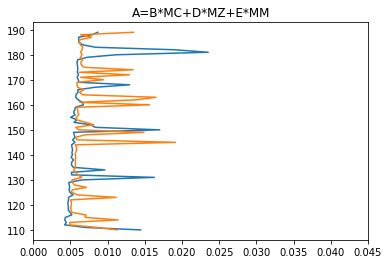

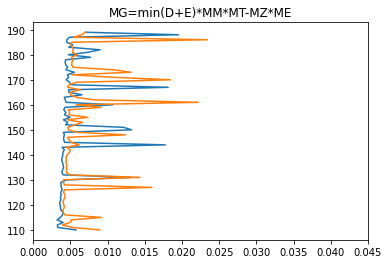

In [31]:
plt.title(FIRST_PLOT)
plt.xlim(0, 0.045)
plt.plot(runs.xs_1_1, runs.ys_1_1)
plt.plot(runs.xs_2_1, runs.ys_2_1)
plt.show()

plt.title(SECOND_PLOT)
plt.xlim(0, 0.045)
plt.plot(runs.xs_1_2, runs.ys_1_2)
plt.plot(runs.xs_2_2, runs.ys_2_2)
plt.show()